<a href="https://colab.research.google.com/github/ujjwalrajput31/python-ml-portfolio/blob/main/customer_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation clustering using KMeans,hierarchy clustering and PCA**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df=pd.read_csv('/content/segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df=df.drop('ID',axis=1)

In [5]:
df.isna().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


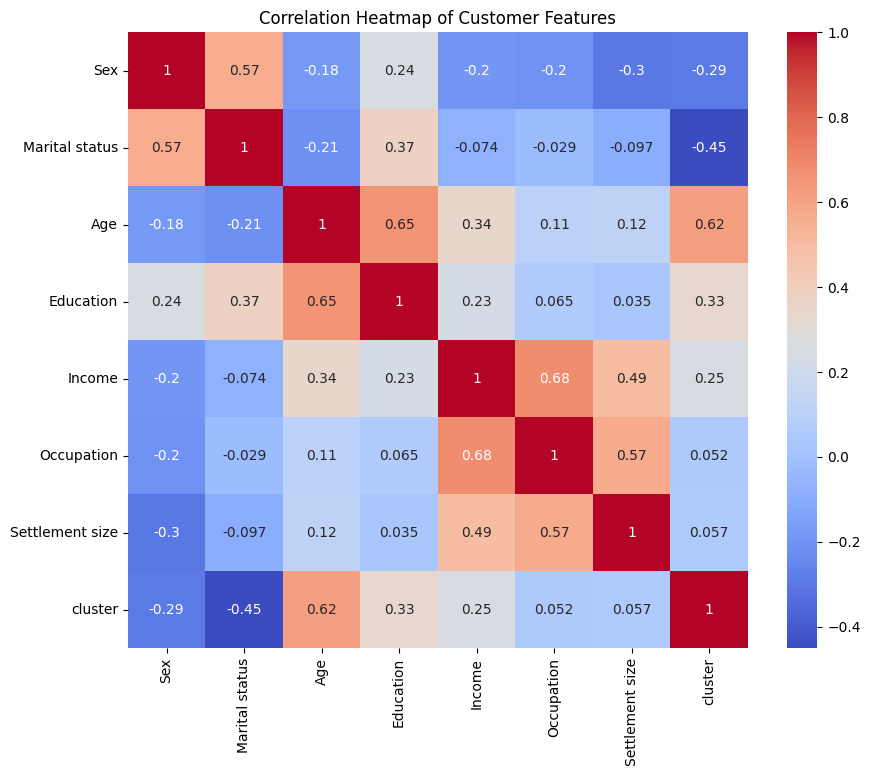

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of Customer Features')
plt.show()

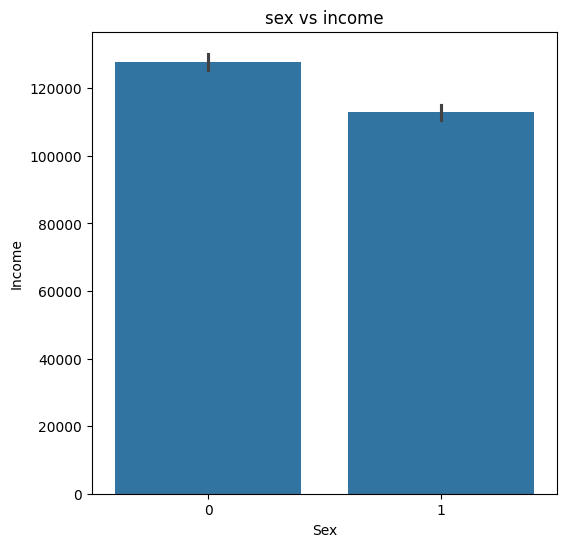

In [8]:
plt.figure(figsize=(6,6))
sns.barplot(data=df , x='Sex' , y = 'Income')
plt.title('sex vs income')
plt.show()


/tmp/ipython-input-3946830017.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df , x='Age' , y = 'Income' , shade = True)


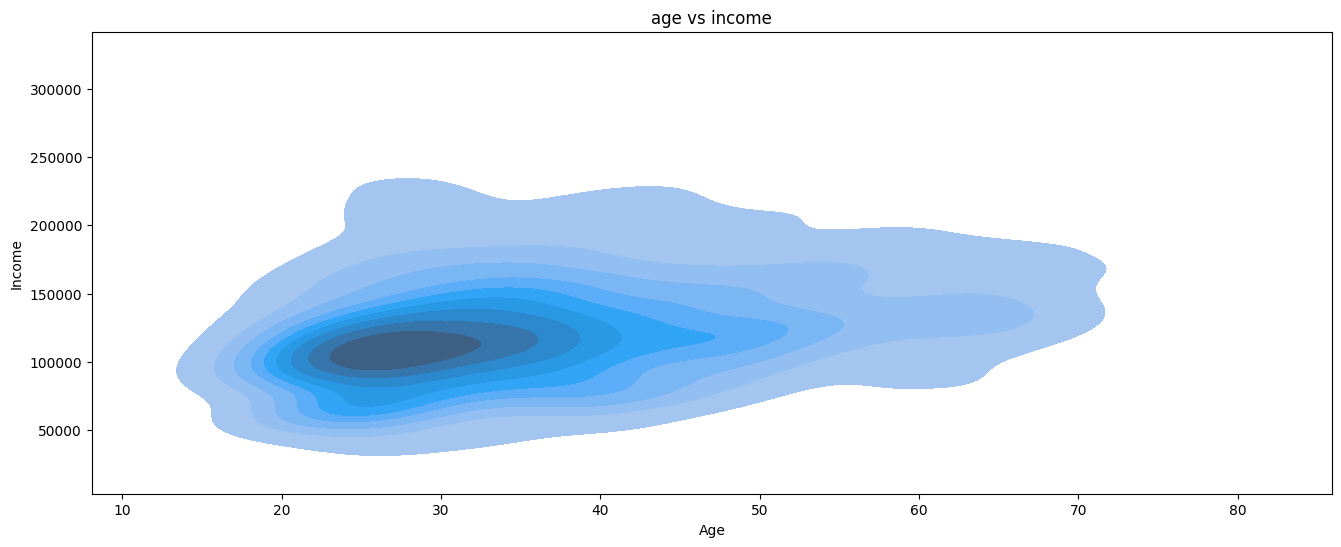

In [9]:
plt.figure(figsize=(16,6))
sns.kdeplot(data=df , x='Age' , y = 'Income' , shade = True)
plt.title('age vs income')
plt.show()

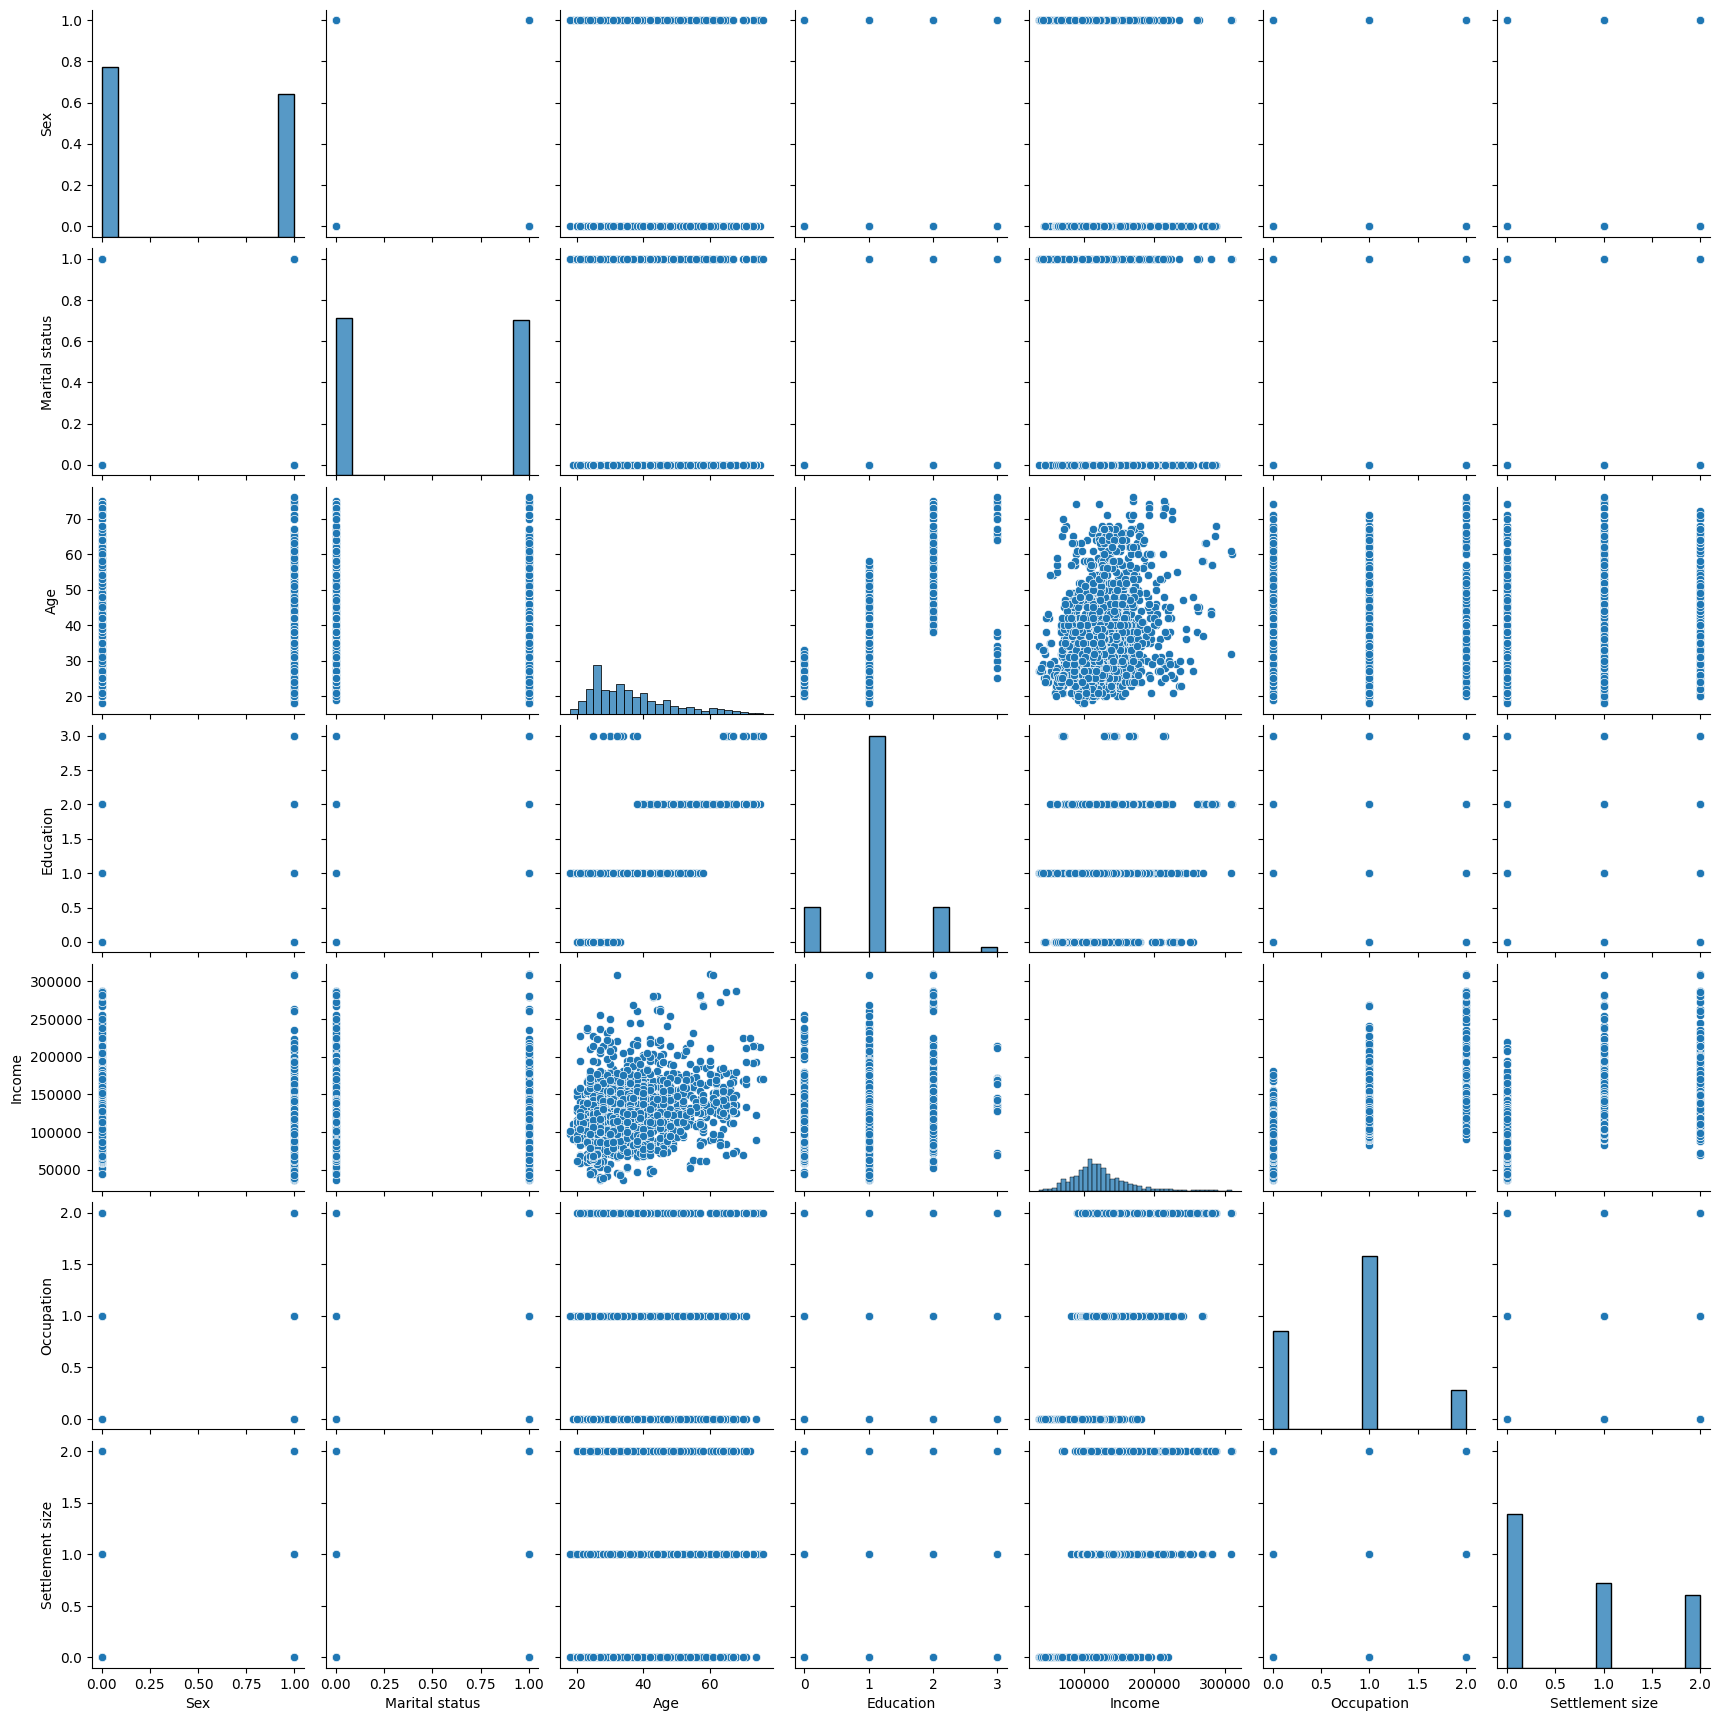

In [10]:
sns.pairplot(df,diag_kind='hist')

In [11]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(df)

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=50,random_state=42)
    kmeans.fit_predict(X_scaler)
    wcss.append(kmeans.inertia_)

print('Inertia:',kmeans.inertia_)

Inertia: 4286.145681965697


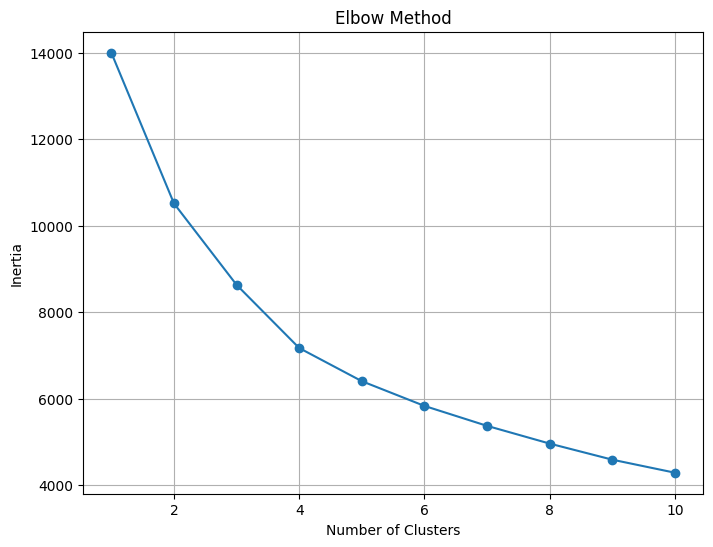

In [13]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
sils=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,n_init=50,random_state=42)
    labels=kmeans.fit_predict(X_scaler)
    sils.append(silhouette_score(X_scaler,labels))

print('Silhouette Score:',silhouette_score(X_scaler,labels))

Silhouette Score: 0.30907683385268014


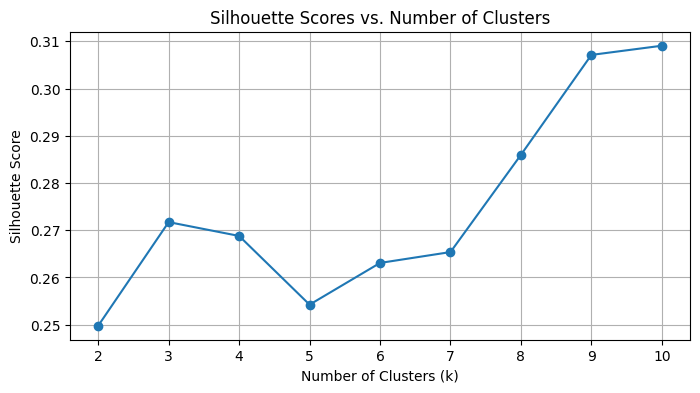

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sils, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [16]:
best_k=4
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
df['cluster']= kmeans.fit_predict(X_scaler)

In [18]:
display(df.head())

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [19]:
cluster_summary=df.groupby('cluster').mean()
print(cluster_summary)

              Sex  Marital status        Age  Education         Income  \
cluster                                                                  
0        0.853901        0.997163  28.963121   1.068085  105759.119149   
1        0.029825        0.173684  35.635088   0.733333  141218.249123   
2        0.352814        0.019481  35.577922   0.746753   97859.852814   
3        0.501901        0.692015  55.703422   2.129278  158338.422053   

         Occupation  Settlement size  
cluster                               
0          0.634043         0.422695  
1          1.271930         1.522807  
2          0.329004         0.043290  
3          1.129278         1.110266  


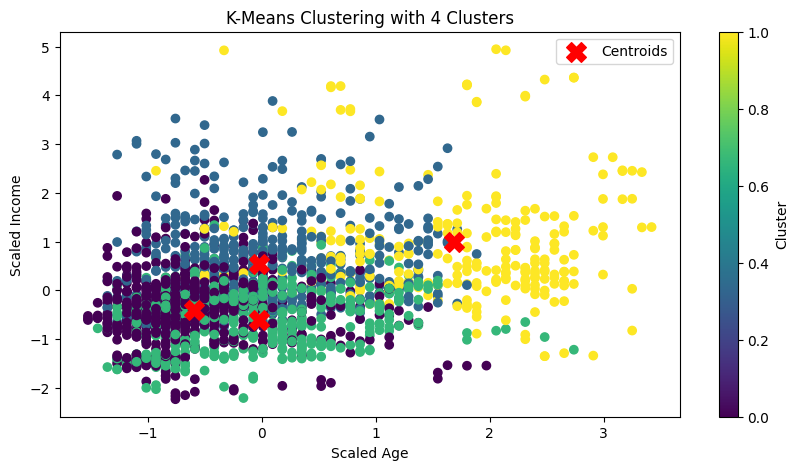

In [20]:
features = df.columns.tolist()
plt.figure(figsize=(10, 5))
plt.scatter(X_scaler[:, features.index('Age')], X_scaler[:, features.index('Income')], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, features.index('Age')], kmeans.cluster_centers_[:, features.index('Income')], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Kmeans with PCA (2D)')

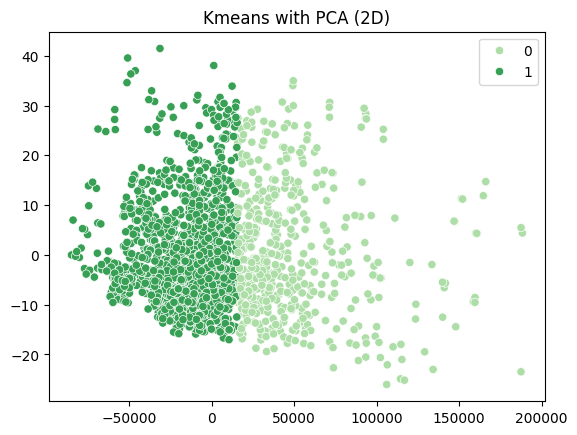

In [21]:
from sklearn.decomposition import PCA
kmean=KMeans(n_clusters=2,init="k-means++")
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)
kmean.fit(df_pca)

sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=kmean.labels_,palette="Greens")
plt.legend()
plt.title("Kmeans with PCA (2D)")

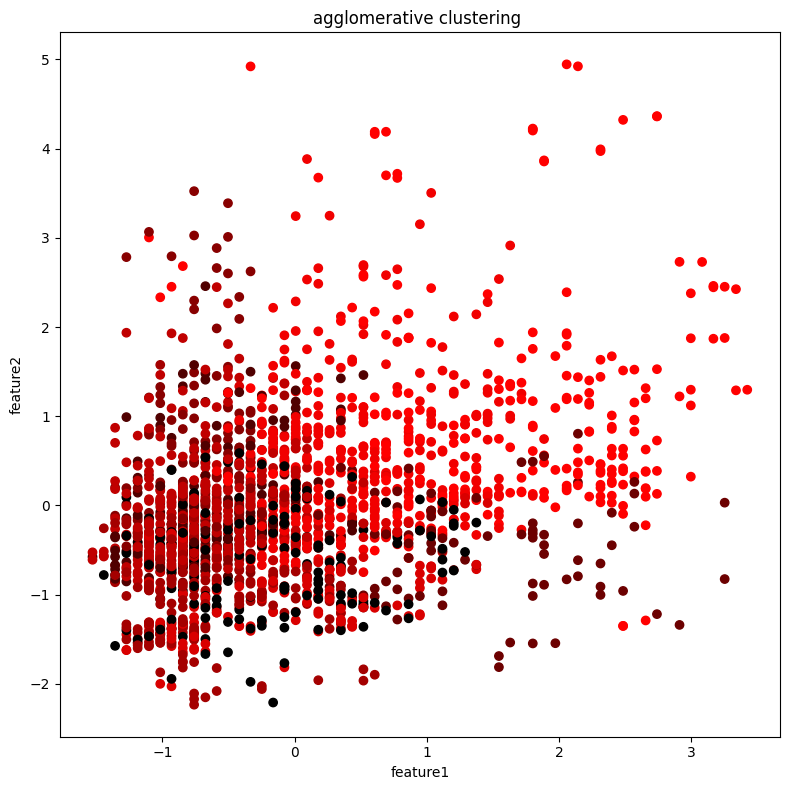

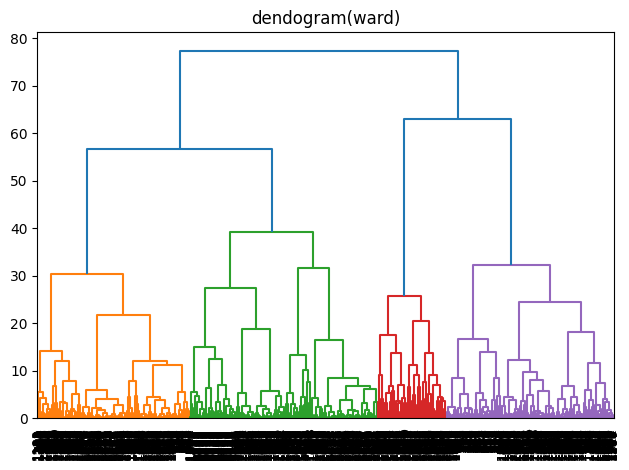

silhouette 0.302


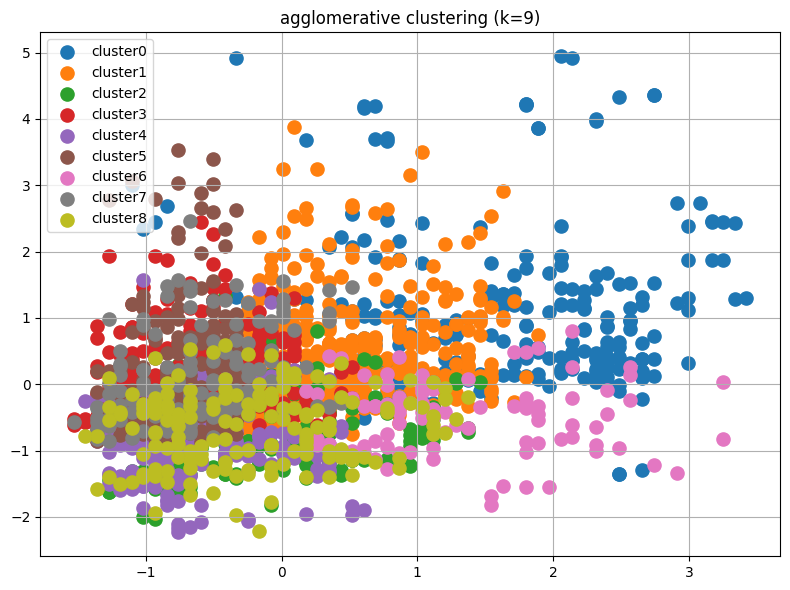

In [22]:
agg = AgglomerativeClustering(n_clusters=9, linkage='ward', metric='euclidean')
labels1 = agg.fit_predict(X_scaler)

plt.figure(figsize=(8,8))
plt.scatter(X_scaler[:,2],X_scaler[:,4],c=labels1,cmap='flag')
plt.title('agglomerative clustering ')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.tight_layout()
plt.show()

linked=linkage(X_scaler,method='ward')
dendrogram(linked,orientation='top',leaf_rotation=90,leaf_font_size=9)
plt.title('dendogram(ward)')
plt.tight_layout()
plt.show()

print("silhouette",round(silhouette_score(X_scaler,labels1),3))

k = 9 # Define k based on the number of clusters used in AgglomerativeClustering
plt.figure(figsize=(8,6))
for cl in range(k):
  pts=X_scaler[labels1==cl]
  plt.scatter(pts[:,2],pts[:,4],s=90,label=f'cluster{cl}')
plt.title(f'agglomerative clustering (k={k})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()